# **Cvičení 1 - Kombinatorika**
## Michal Béreš, Martina Litschmannová, Adéla Vrtková
---

# Typy kombinací

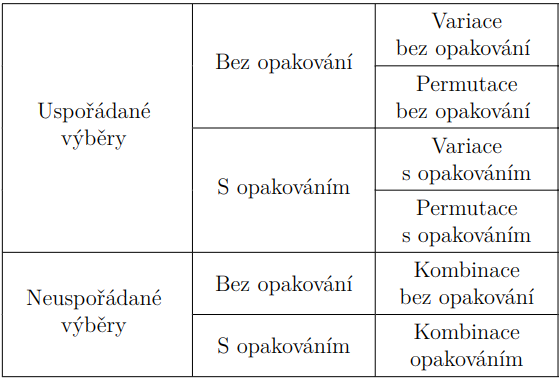

## Variace

$V(n,k)$ - variace bez opakování
- $n$ je celkový počet entit
- $k$ je velikost výběru

$$V(n,k) = \frac{n!}{(n-k)!}$$

Příklad: Kolika způsoby může dopadnout závod (zlatá, stříbrná, bronzová medaile), soutěží-li 10 běžců?

In [ ]:
# funkce se vytváří příkazem fucntion, je to objekt jehož jméno je dáno až proměnnou
# do které tento objekt přiřadím
variace <- function(n, k) # zde zadávám počet parametrů a jejich jména
{ # celé tělo funkce je uzavřeno mezi závorkami {...}
    citatel <- factorial(n) # faktoriál v originálním Rku existuje tak jej použijeme
    jmenovatel <- factorial(n - k)
    return(citatel / jmenovatel) # to co funkce vrátí se dává do příkazu return(...)
}


In [ ]:
# řešení příkladu:
variace(10, 3)

## Permutace

Jedná se o speciální případ variace, kdy $n=k$.

$P(n)=V(n,n)$ - permutace
- $n$ je celkový počet entit a zároveň velikost výběru

$$P(n) = n!$$

Příklad: Kolika způsoby si může 5 lidí sednout do řady mající 5 míst?

In [ ]:
permutace <- function(n) {
  return(factorial(n))
}


In [ ]:
# řešení příkladu:
permutace(5)

## Variace s opakováním

$V^*(n,k)$ - variace s opakováním
- $n$ je celkový počet entit
- $k$ je velikost výběru

$$V^*(n,k) = n^k$$

Příklad: Kolik různých kódů o délce 4 znaků lze vytvořit z písmen A, B, C?

In [ ]:
variace_opak <- function(n, k) {
    return(n^k)
}


In [ ]:
# řešení příkladu:
variace_opak(3, 4)

## Permutace s opakováním

$P^*(n_1,n_2,n_3,....,n_k)$ - permutace s opakováním
- $n_1,..., n_k$ jednotlivé počty unikátních entit

$$P^*(n_1,n_2,n_3,....,n_k) = \frac{n!}{n_1! \cdot n_2! \cdot n_3! \cdot ... \cdot n_k!}$$

Příklad: Kolik různých slov lze vytvořit jako anagram z písmen slova "AUTOMAT"?

In [ ]:
permutace_opak <- function(vec_n) # vec_n je vektro počtů hodnot př.: vec_n = c(2,2,2,4,3)
{
    n <- sum(vec_n) # spočteme kolik máme hodnot celkem
    res_temp <- factorial(n) # jejich faktoriál = hodnota v čitateli
    # jednoduchý cyklus začíná příkazem for, pak v závorkách následuje název iterátoru a z
    # jakého seznamu bude brán
    for (pocet in vec_n) # pocet je iterátor a postupně bude nabývat hodnot z vektoru vec_n
    {
        # postupně dělíme faktoriálem každého počtu unikátních entit
        res_temp <- res_temp / factorial(pocet)
    }
    return(res_temp)
}


In [ ]:
# řešení příkladu:

# A 2x, U 1x, T 2x, O 1x, M 1x
pocty <- c(2, 1, 2, 1, 1) # vektor počtů unikátních entit

permutace_opak(pocty)

## Kombinace

$C(n,k)$ - kombinace = tedy variace, kde nezálíží na pořadí
- $n$ je celkový počet entit
- $k$ je velikost výběru

$$C(n,k) =  \frac{V(n,k)}{k!} =  \frac{n!}{k!(n-k)!}$$

Příklad: Kolika způsoby můžeme vybrat 3 lidi z 10?

In [ ]:
kombinace <- function(n, k) {
  return(choose(n, k)) # funkce pro kombinace už existuje v Rku a jmenuje se choose
}


In [ ]:
# řešení příkladu:
kombinace(10, 3)


## Kombinace s opakováním

$C^*(n,k)$ – kombinace s opakováním  
- $n$ je počet různých skupin  
- $k$ je velikost výběru  

Vzorec pro **kombinace s opakováním** lze odvodit pomocí **uspořádání výběru**, a to tak, že místo výběru konkrétních prvků se zaměříme na **rozdělení $k$ objektů** do **$n$ skupin**.

Například výběry (s opakováním, kde nezáleží na pořadí) 6 písmen ze {X, Y, Z} lze reprezentovat jako:

```
XX|Y|ZZZ → (2,1,3)
X|Y|ZZZZ → (1,1,4)
|Y|ZZZZZ → (0,1,5)
||ZZZZZZ → (0,0,6)
```

- Počet separátorů je počet skupin minus 1, tedy $n-1$. 
- Dále máme $k$ vybraných objektů, což znamená, že celkově máme $(k + n - 1)$ pozic, z nichž vybíráme $(n-1)$ pro separátory. 
- Protože při výběru pozic pro separátory nezáleží na pořadí, počet možností je dán kombinačním číslem $C(n+k-1,n-1)$. 
- A protože kombinační čísla jsou symetrická vzhledem k velikosti výběru, platí $C(n,k) = C(n,n-k)$.

Tedy:

$$C^*(n,k) = C(n+k-1,n-1) = C(n+k-1,k) = \frac{(n+k-1)!}{k!(n-1)!}$$

### Příklad
Kolik různých nákupů můžeme udělat v obchodě, kde nabízejí 5 různých druhů zboží, pokud chceme koupit 7 kusů zboží? (Předpokládáme neomezené množství zboží.)
```

In [ ]:
kombinace_opak <- function(n, k) {
  return(choose(n + k - 1, k)) # použijeme známý vzorec
}


In [ ]:
# řešení příkladu:
kombinace_opak(5, 7)

---
# Úlohy k procvičení
---
## Příklad 1.

Které heslo je bezpečnější?
* Heslo o délce osm znaků složené pouze z číslic.
* Heslo o délce pět znaků složené pouze z písmen anglické abecedy.

In [ ]:
# heslo 1
h1 <- variace_opak(n = 10, k = 8)
# heslo 2
h2 <- variace_opak(n = 26, k = 5)
h1 / h2


## Příklad 2.

Jak dlouho by trvalo vyřešení problému obchodního cestujícího pro n = 10 měst hrubou silou, jestliže vyhodnocení délky každé z možných cest trvá 1 µs?

1. Kolik je možných setřízení pro n = 10 měst?
2. Pokud jsou cesty symetrické (z A do B je stejná vzdálenost jako z B do A), kolik je unikátních cyklů?

In [ ]:
n <- 10

# 1.
permutace(n)

# 2.
pocet <- permutace(n - 1) / 2
pocet

# čas
cas <- pocet / 1000000
cas


## Příklad 3.

Jak rozdělit kořist mezi 2 loupežníky, aby dostali oba věci ve stejné hodnotě (případně co nejbližší hodnotě). Tj. lze rozdělit N zadaných čísel do dvou skupin tak, aby součet čísel v obou skupinách byl stejný (nebo alespoň co nejbližší)?

**Kolik možností by bylo třeba vyzkoušet, pokud bychom úlohu řešili hrubou silou?**

In [ ]:
N <- 10
L <- 4
variace_opak(n = L, k = N)


## Příklad 4.

Kolik anagramů slova "AUTO" můžeme vytvořit?

Kolik anagramů slova "AUTOMOBILKA" můžeme vytvořit? Kolik z nich začína na "K"?

In [ ]:
permutace(4)
vec <- c(2, 1, 1, 2, 1, 1, 1, 1, 1)
sum(vec)
permutace_opak(vec)

vec <- c(2, 1, 1, 2, 1, 1, 1, 1)
sum(vec)
permutace_opak(vec)


## Příklad 5. 

V obchodě mají 6 druhů barevných hrníčků. 
- Kolika různými způsoby můžeme koupit 4 různě-barevné hrníčky?
- Kolika různými možnostmi můžeme nakoupit 5 hrníčků (pokud nám nevadí více od stejné barvy)?
- Jak se situace změní, pokud budou mít od každého pouze 4 kusy (a nám nevadí více stejné barvy)?

In [ ]:
kombinace(6, 4)
kombinace_opak(6, 5)
kombinace_opak(6, 5) - 6


## Příklad 6. (sbírka kap. 1, př. 7,8)

Z urny se třemi koulemi, dvěma červenými a jednou bílou, budou současně vybrány dvě koule.
Student a učitel uzavřou sázku. Pokud budou obě koule stejné barvy, vyhraje student. Pokud
budou mít koule různou barvu, vyhraje učitel. 
- Je hra férová? Jaké jsou pravděpodobnosti výhry učitele a studenta?
- Jakou kouli je třeba přidat, aby hra byla férová?

In [ ]:
kombinace(3, 2)
kombinace(4, 2)


## Příklad 7.

V balíčku je 5 různých párů ponožek (levá a pravá ponožka je vždy stejná).
- Kolik různých dvojic ponožek lze vybrat?
- Kolika různými způsoby se mohu obout? (tj. záleží na tom co je na které noze) 

In [ ]:
kombinace_opak(n = 5, k = 2)
variace_opak(n = 5, k = 2)
kombinace_opak(n = 5, k = 2) * 2 - 5


## Příklad 8.

Mám 12 závaží o hmotnostech 1,2,...,12 kg.
- Kolika způsoby je mohu rozdělit na 2 hromádky?
- Kolika způsoby je mohu rozdělit na 3 hromádky?
- Kolika způsoby je mohu rozdělit na 3 hromádky, má-li na všech být stejný počet závaží?
- Kolika způsoby je mohu rozdělit na 3 hromádky o stejném počtu závaží, pokud hmotnost žádné z nich nesmí překročit 40 kg? 

In [ ]:
# 1.
variace_opak(2, 12)
# 2.
variace_opak(3, 12)

In [ ]:
# 3.
permutace_opak(c(4, 4, 4)) / permutace(3)
# nebo
kombinace(12, 4) * kombinace(8, 4) * kombinace(4, 4) / permutace(3)

In [ ]:
# 4.
# kolik je možností, které nejsou validní, tedy obsahují hromádku s více než 40 kg?
# {9,10,11,12} se součtem 42,
# {8,10,11,12} se součtem 41.
# tedy pro obě možnosti se jedná o úlohu rozmístění zbylých 8 závaží do 2 hromádek
permutace_opak(c(4, 4)) / permutace(2)
permutace_opak(c(4, 4, 4)) / permutace(3) - 2 * (permutace_opak(c(4, 4)) / permutace(2))

## Příklad 9.

Mám 20 semínek od každého ze tří druhů zeleniny (mrkev, ředkvička, celer). Bohužel se pomíchala.
- Do truhlíku zasadím 5 náhodných semínek. Jaká je pravděpodobnost, že mezi nimi budou alespoň tři ředkvičky?
- Do truhlíku zasadím 5 náhodných semínek. Jaká je pravděpodobnost, že mezi nimi bude více mrkví než celerů? 

In [ ]:
# 1.
# počet všech možností výběru 5-ti semínek
kombinace(60, 5)
# počet možností výběru kde jsou právě 3 ředkvičky
kombinace(20, 3) * kombinace(40, 2)
# počet možností výběru kde jsou právě 4 ředkvičky
kombinace(20, 4) * kombinace(40, 1)
# počet možností výběru kde je právě 5 ředkviček
kombinace(20, 5)

# pravděpodobnost, že výběr obsahuje alespoň 3 ředkvičky
(kombinace(20, 3) * kombinace(40, 2) + kombinace(20, 4) * kombinace(40, 1) + kombinace(20, 5)) / kombinace(60, 5)


In [ ]:
# 2.
# kolik je možností kdy bude přesně stejně mrkví a celerů (0 a 0) (1 a 1) a (2 a 2)
kombinace(20, 5)
kombinace(20, 3) * kombinace(20, 1) * kombinace(20, 1)
kombinace(20, 1) * kombinace(20, 2) * kombinace(20, 2)

# ve zbytku možností je to půl na půl, více mrkví nebo více celerů
((kombinace(60, 5) - (
    kombinace(20, 5) +
        kombinace(20, 3) * kombinace(20, 1) * kombinace(20, 1) +
        kombinace(20, 1) * kombinace(20, 2) * kombinace(20, 2))) / 2) / kombinace(60, 5)
